# Setting working directory and loading dat

In [1]:
import os 
os.chdir(r"E:\Mtech\2ND_SEM\IDS_assgn\ml-100k")
os.getcwd ()

'E:\\Mtech\\2ND_SEM\\IDS_assgn\\ml-100k'

In [2]:
import pandas as pd 
import numpy as np 
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import pairwise_distances 

# Information about the data


In [3]:
#Information about the data
info = pd.read_csv("u.info", sep=" ", header=None)
info.columns=['Counts', 'Type']
info

,Counts,Type
0,943,users
1,1682,items
2,100000,ratings


So there are total 1682 Movies of different genre with 100000 ratings given by 943 unique users

# Load the Ratings data¶

In [4]:
data = pd.read_csv('u.data', sep="\t", header=None)
data.columns = ['user id', 'movie_id', 'rating', 'timestamp']
data.head()
data.shape
data.describe()


,user id,movie_id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


In [5]:
data.shape

(100000, 4)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
user id      100000 non-null int64
movie_id     100000 non-null int64
rating       100000 non-null int64
timestamp    100000 non-null int64
dtypes: int64(4)
memory usage: 3.1 MB


### minimum rating given to a movie

In [7]:
#minimum rating given to a movie

data['rating'].min() 

1

### maximum rating given to a movie

In [8]:
#maximum rating given to a movie
data['rating'].max()

5

In [9]:
#checking if any row has null values
data.isnull().any()

user id      False
movie_id     False
rating       False
timestamp    False
dtype: bool

So in Rating data there is no null value

-0.510143949217015

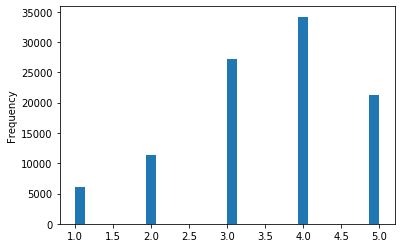

In [10]:
data.rating.plot.hist(bins=30)

plt.xlabel=("rating")
plt.ylabel=("count")
plt.title=("rating")
data.rating.skew()

So we can see that skewnes is 0.5 which approx. 0 

# Timestamp column doesn't have description what that means , So we can drop this column as we dont know how this will help us in Model

In [11]:
#dropping of timestamp colum.
data.drop(['timestamp'], axis=1, inplace=True)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 3 columns):
user id     100000 non-null int64
movie_id    100000 non-null int64
rating      100000 non-null int64
dtypes: int64(3)
memory usage: 2.3 MB


# Load the Movies data


In [13]:
genre = pd.read_csv('u.genre', sep="|", encoding='latin-1', header=None)
genre.drop(genre.columns[1], axis=1, inplace=True)
genre.columns = ['Genres']
genre_list = list(genre['Genres'])
genre_list

['unknown',
 'Action',
 'Adventure',
 'Animation',
 "Children's",
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

In [14]:
##Loading movies  data in dataframe 

item = pd.read_csv('u.item',sep='|',encoding='latin-1')

In [15]:
item.columns = ['movie_id', 'movie_name' ,'release_date','video release date', 'IMDb URL', 'unknown', 'Action', 
                'Adventure', 'Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 
                'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

# Null value check and treatment  in movies data 

In [16]:
##Now check again if column dropped and How many now missing values
print(item.isnull().sum())
for col in item.columns:
    pct_missing = np.mean(item[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))
print(item.shape)

movie_id                 0
movie_name               0
release_date             1
video release date    1681
IMDb URL                 3
unknown                  0
Action                   0
Adventure                0
Animation                0
Children's               0
Comedy                   0
Crime                    0
Documentary              0
Drama                    0
Fantasy                  0
Film-Noir                0
Horror                   0
Musical                  0
Mystery                  0
Romance                  0
Sci-Fi                   0
Thriller                 0
War                      0
Western                  0
dtype: int64
movie_id - 0.0%
movie_name - 0.0%
release_date - 0.0%
video release date - 100.0%
IMDb URL - 0.0%
unknown - 0.0%
Action - 0.0%
Adventure - 0.0%
Animation - 0.0%
Children's - 0.0%
Comedy - 0.0%
Crime - 0.0%
Documentary - 0.0%
Drama - 0.0%
Fantasy - 0.0%
Film-Noir - 0.0%
Horror - 0.0%
Musical - 0.0%
Mystery - 0.0%
Romance - 0.0%
Sci-Fi - 0

So from above we can see that  video release date  data have all null values so we will remove that as that will make no sense 
in our model .



In [17]:
# So video release date drop that column .

item.drop(['video release date'], axis=1, inplace=True)

In [18]:
###Now check again if column dropped and How many now missing values
print(item.isnull().sum())
for col in item.columns:
    pct_missing = np.mean(item[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))
print(item.shape)

movie_id        0
movie_name      0
release_date    1
IMDb URL        3
unknown         0
Action          0
Adventure       0
Animation       0
Children's      0
Comedy          0
Crime           0
Documentary     0
Drama           0
Fantasy         0
Film-Noir       0
Horror          0
Musical         0
Mystery         0
Romance         0
Sci-Fi          0
Thriller        0
War             0
Western         0
dtype: int64
movie_id - 0.0%
movie_name - 0.0%
release_date - 0.0%
IMDb URL - 0.0%
unknown - 0.0%
Action - 0.0%
Adventure - 0.0%
Animation - 0.0%
Children's - 0.0%
Comedy - 0.0%
Crime - 0.0%
Documentary - 0.0%
Drama - 0.0%
Fantasy - 0.0%
Film-Noir - 0.0%
Horror - 0.0%
Musical - 0.0%
Mystery - 0.0%
Romance - 0.0%
Sci-Fi - 0.0%
Thriller - 0.0%
War - 0.0%
Western - 0.0%
(1681, 23)


# So now there are only few rows which have missing data , So we can drop those rows as there will be no impact on our model 

In [19]:
#drop null rows
item=item.dropna()
item.isnull().any()
##Now check again if column dropped and How many now missing values
print(item.isnull().sum())
for col in item.columns:
    pct_missing = np.mean(item[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))
print(item.shape)

#Now column with missing value 

movie_id        0
movie_name      0
release_date    0
IMDb URL        0
unknown         0
Action          0
Adventure       0
Animation       0
Children's      0
Comedy          0
Crime           0
Documentary     0
Drama           0
Fantasy         0
Film-Noir       0
Horror          0
Musical         0
Mystery         0
Romance         0
Sci-Fi          0
Thriller        0
War             0
Western         0
dtype: int64
movie_id - 0.0%
movie_name - 0.0%
release_date - 0.0%
IMDb URL - 0.0%
unknown - 0.0%
Action - 0.0%
Adventure - 0.0%
Animation - 0.0%
Children's - 0.0%
Comedy - 0.0%
Crime - 0.0%
Documentary - 0.0%
Drama - 0.0%
Fantasy - 0.0%
Film-Noir - 0.0%
Horror - 0.0%
Musical - 0.0%
Mystery - 0.0%
Romance - 0.0%
Sci-Fi - 0.0%
Thriller - 0.0%
War - 0.0%
Western - 0.0%
(1678, 23)


In [20]:

# convert in category to count and use these columns
item.movie_name = item.movie_name.astype('category')


In [21]:
item.shape

(1678, 23)

# Load the User data

In [22]:
user = pd.read_csv('u.user', sep="|", encoding='latin-1', header=None)
user.columns = ['user id', 'age', 'gender', 'occupation', 'zip code']
user.head()
user.shape

(943, 5)

# check null values in user dataframe

In [23]:
user.isnull().any()

user id       False
age           False
gender        False
occupation    False
zip code      False
dtype: bool

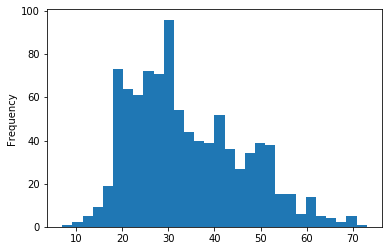

In [24]:
##Age distribution of user in user data set 

user.age.plot.hist(bins=30)
plt.xlabel=("Age")
plt.ylabel=("count")
plt.title=("Age distribution")

we can remove zip code column as we will not using this column in modeling 

In [25]:
user['age'].skew()



0.6053815216208658

In [26]:
#user['age']=np.log(user['age'])
#user['age'].skew()

Note: As we can see the skewed values lies between the 0.5 to 1 range. so, data is moderately skewed and right skewed(but it’s fine to train the model with it).

In [27]:
#  drop that column .

user.drop(['zip code'], axis=1, inplace=True)

In [28]:
user.head()

,user id,age,gender,occupation
0,1,24,M,technician
1,2,53,F,other
2,3,23,M,writer
3,4,24,M,technician
4,5,33,F,other


# checking distribution of movies over genres is  balanced or not ?

In [29]:
item_genre=item[item.columns[4:25]] 
##count number of movies per genre 
count_genre=item[['unknown', 'Action', 
                'Adventure', 'Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 
                'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']].apply(pd.Series.value_counts).transpose()

In [30]:
#dropping column with false values of genre. 
count_genre.drop(count_genre.columns[[0]], axis = 1, inplace = True) 
count_genre = count_genre.rename({1:"movies_per_genre"}, axis='columns') 
count_genre.index.name = 'genre'
count_genre.reset_index(inplace=True)

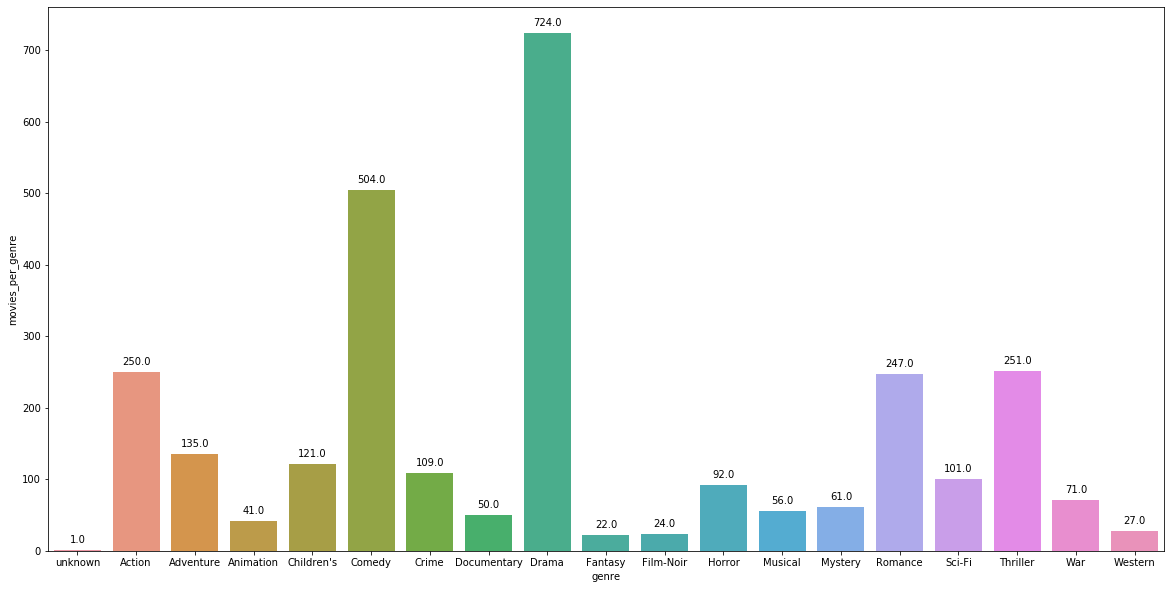

In [31]:
plt.figure(figsize=(20, 10))
ax = sns.barplot(data=count_genre, y= "movies_per_genre", x = "genre") 
for p in ax.patches:  
    ax.annotate(np.round(p.get_height(),decimals=0),(p.get_x()+p.get_width()/2., p.get_height()),va='center', ha='center',  xytext=(0, 10),textcoords='offset points' )  
plt.savefig("add_text_to_top_of_bars_in_barplot_Seaborn_Python.png")	



In [32]:
#Drop unknown genre as it contains only 1 Value  and this will not help in model building 
item.drop(['unknown'], axis=1, inplace=True)

# We will take  top 10 genre and will take only these in final model

In [33]:
#treat class imblanace and select only top genre as other has less values 

count_genre=count_genre.sort_values("movies_per_genre", ascending=False)
top_10_genre=count_genre['genre'].head(10)
top_10_genre

8          Drama
5         Comedy
16      Thriller
1         Action
14       Romance
2      Adventure
4     Children's
6          Crime
15        Sci-Fi
11        Horror
Name: genre, dtype: object

# merging two dataframes "movies.csv" and "ratings.csv"

In [34]:
##merging two dataframes "movies.csv" and "ratings.csv"

data_item=pd.merge(data,item,on = 'movie_id')
data_item.head(3)


,user id,movie_id,rating,movie_name,release_date,IMDb URL,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,196,242,3,Kolya (1996),24-Jan-1997,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,63,242,3,Kolya (1996),24-Jan-1997,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,226,242,5,Kolya (1996),24-Jan-1997,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
##Creating new genre list after dropping unknown genre 
genre.columns = ['Genres']
genre_list1 = np.delete(genre_list, 0)
genre_list1

array(['Action', 'Adventure', 'Animation', "Children's", 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War',
       'Western'], dtype='<U11')

# WHICH ARE THE TOP 3 MOVIES IN EACH GENRE?

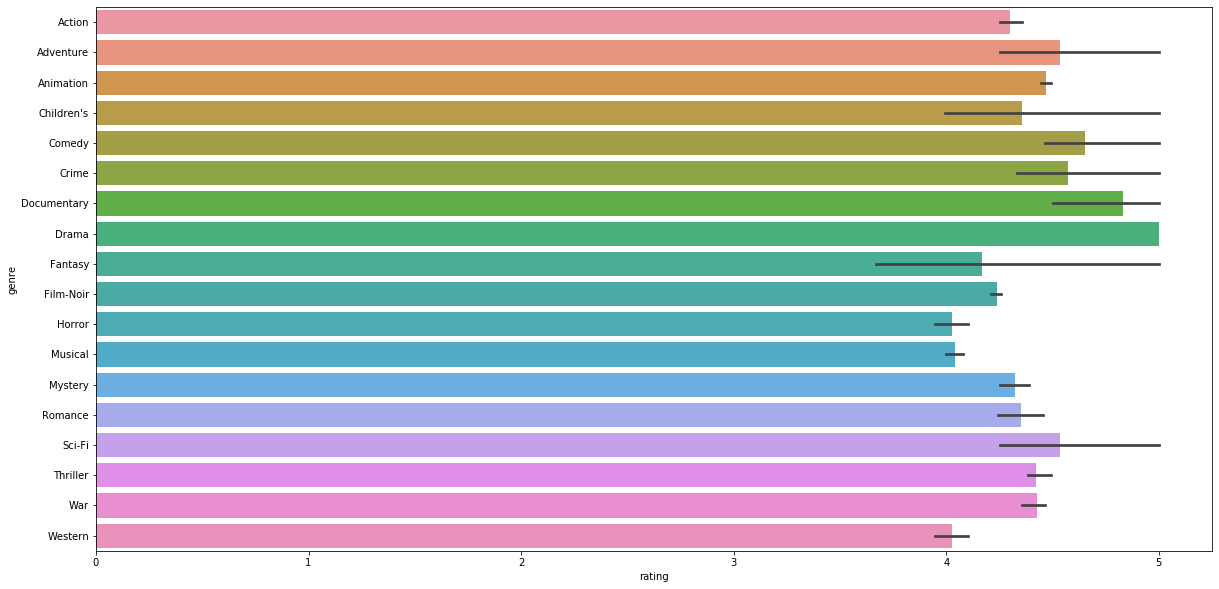

In [36]:
top_3_genre = pd.DataFrame()
for gen in genre_list1:
    g_r = data_item[data_item[gen] == 1]
    new_gen = pd.DataFrame(g_r.groupby(['movie_name'], as_index=False)['rating'].mean().sort_values(['rating', 'movie_name'], ascending=[False, True]).head(3))
    new_gen.insert(0, 'genre', gen)
    top_3_genre = top_3_genre.append(new_gen, ignore_index=True)

plt.figure(figsize=(20, 10))
ax = sns.barplot(data=top_3_genre, y= "genre", x = "rating") 


# top 25 most rated movies

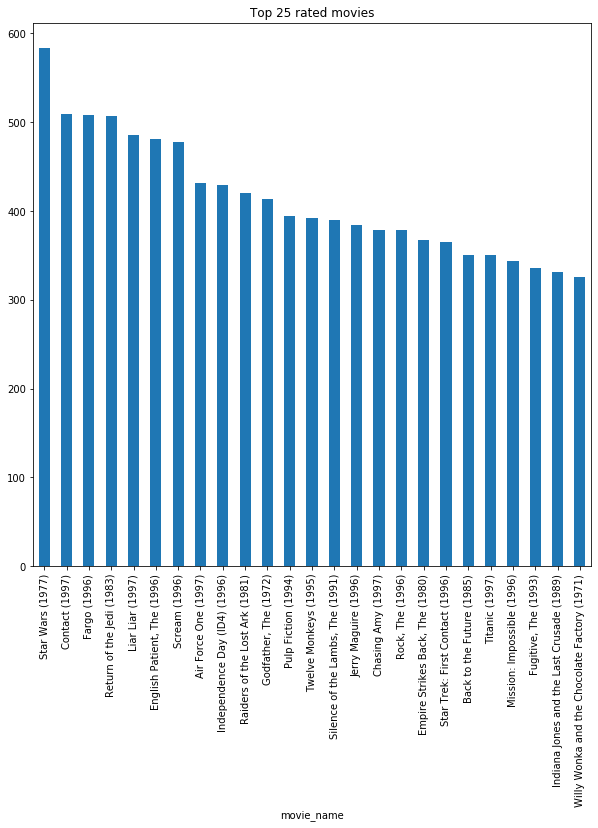

In [37]:
#top 25 most rated movies
plt.figure(figsize=(10, 10))
most_rated = data_item.groupby('movie_name').size().sort_values(ascending=False)[:25]
most_rated.plot(kind="bar",title="Top 25 rated movies",label="count")


# WHAT ARE THE TOP 3 MOIVES FOR EACH OCCUPATION?

In [38]:
#merge the 'data' table with 'user' table
data_user = pd.merge(data[['user id', 'movie_id', 'rating']], user[['user id', 'occupation']], on='user id')
data_user.drop(columns = ['user id'], inplace=True)

#merge the 'Data_User' dataframe with 'Item' dataframe to get each rating, occupation of user and movie name
data_user_item = pd.merge(data_user[['movie_id', 'rating', 'occupation']], item[['movie_id', 'movie_name']], on='movie_id')
data_user_item.drop(columns = ['movie_id'], inplace=True)

#group the data by occupation and movie name and sort with decreasing average ratings
data_user_item_sorted = data_user_item.groupby(['occupation', 'movie_name'], as_index=False)['rating'].mean().sort_values('rating', ascending=False)

#group data by occupation, movie name and select top 3 movies for each occupation
top_3_occ = data_user_item_sorted.groupby(['occupation']).head(3).sort_values(['occupation', 'movie_name'], ascending=[True, True]).reset_index()
top_3_occ.drop(['index'], axis=1, inplace=True)

top_3_occ.head()

,occupation,movie_name,rating
0,administrator,Raise the Red Lantern (1991),5.0
1,administrator,Selena (1997),5.0
2,administrator,Shall We Dance? (1996),5.0
3,artist,"Deer Hunter, The (1978)",5.0
4,artist,Delicatessen (1991),5.0


# TOP 3 popular genres 

In [39]:
top_3_genre = pd.DataFrame()
for gen in genre_list1:
    g_r = data_item[data_item[gen] == 1]
    new_gen = pd.DataFrame(g_r.groupby(['movie_name'], as_index=False)['rating'].mean().sort_values(['rating', 'movie_name'], ascending=[False, True]).head(3))
    new_gen.insert(0, 'genre', gen)
    top_3_genre = top_3_genre.append(new_gen, ignore_index=True)

In [40]:
top_3_genre.head(10)

,genre,movie_name,rating
0,Action,Star Wars (1977),4.358491
1,Action,"Godfather, The (1972)",4.283293
2,Action,Raiders of the Lost Ark (1981),4.252381
3,Adventure,Star Kid (1997),5.000000
4,Adventure,Star Wars (1977),4.358491
5,Adventure,Raiders of the Lost Ark (1981),4.252381
6,Animation,"Close Shave, A (1995)",4.491071
7,Animation,"Wrong Trousers, The (1993)",4.466102
8,Animation,Wallace & Gromit: The Best of Aardman Animatio...,4.447761
9,Children's,Star Kid (1997),5.000000


So we can observe from above ouput that {ACTION,ADVENTURE,ANIMATION) are top genre in data set

# merging of all 3 dataframe to single dataframe 

In [41]:
final=pd.merge(data_item,user,on = 'user id')

# Check occupation which give rating . We will select only those occupation for final model which give rating >=2100 others will be dropped 

In [42]:
top_occupation = final.groupby('occupation').agg({'rating': [np.size, np.mean]})

atleast_2100_rating = top_occupation['rating']['size'] >= 2100
top_occupation=top_occupation[atleast_2100_rating].sort_values([('rating', 'mean')], ascending=False)
top_occupation


rating          
                size      mean
occupation                    
educator        9400  3.670426
artist          2296  3.651132
administrator   7448  3.634130
programmer      7765  3.565486
librarian       5256  3.560502
other          10611  3.549995
engineer        8128  3.538632
technician      3488  3.529817
student        21851  3.513844
writer          5519  3.375612
executive       3384  3.347813
healthcare      2796  2.896638

In [43]:
#Calculate mean rating of all movies 
final.groupby('movie_name')['rating'].mean().sort_values(ascending=False).head() 

movie_name
Saint of Fort Washington, The (1993)          5.0
Santa with Muscles (1996)                     5.0
Marlene Dietrich: Shadow and Light (1996)     5.0
Someone Else's America (1995)                 5.0
Prefontaine (1997)                            5.0
Name: rating, dtype: float64

In [44]:
#Calculate total rating of all movies 
ratings=final.groupby('movie_name')['rating'].count().sort_values(ascending=False).head() 

# Feature Engineering


# Average Rating



In [45]:

Average_ratings = pd.DataFrame(data_item.groupby('movie_name')['rating'].mean())
Average_ratings.head(10)
Average_ratings['Total Ratings'] = pd.DataFrame(data_item.groupby('movie_name')['rating'].count())
Average_ratings.head(10)

,rating,Total Ratings
movie_name,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
2 Days in the Valley (1996),3.225806,93
"20,000 Leagues Under the Sea (1954)",3.500000,72
2001: A Space Odyssey (1968),3.969112,259
3 Ninjas: High Noon At Mega Mountain (1998),1.000000,5


# Which movies are most highly rated?



In [46]:
movie_stats = data_item.groupby('movie_name').agg({'rating': [np.size, np.mean]})
movie_stats.head()

rating          
                            size      mean
movie_name                                
'Til There Was You (1997)      9  2.333333
1-900 (1994)                   5  2.600000
101 Dalmatians (1996)        109  2.908257
12 Angry Men (1957)          125  4.344000
187 (1997)                    41  3.024390

# Check movies which have total ratings >= 100

In [47]:
atleast_100 = movie_stats['rating']['size'] >= 100
movie_stats=movie_stats[atleast_100].sort_values([('rating', 'mean')], ascending=False)


In [48]:
movie_stats.head()

rating          
                                   size      mean
movie_name                                       
Close Shave, A (1995)               112  4.491071
Schindler's List (1993)             298  4.466443
Wrong Trousers, The (1993)          118  4.466102
Casablanca (1942)                   243  4.456790
Shawshank Redemption, The (1994)    283  4.445230

In [49]:
final = pd.concat([final, final.gender.str.get_dummies(sep='|')], axis=1) 
#final = pd.concat([final, final.occupation.str.get_dummies(sep='|')], axis=1) 

final.head()

,user id,movie_id,rating,movie_name,release_date,IMDb URL,Action,Adventure,Animation,Children's,...,Romance,Sci-Fi,Thriller,War,Western,age,gender,occupation,F,M
0,196,242,3,Kolya (1996),24-Jan-1997,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,0,0,...,0,0,0,0,0,49,M,writer,0,1
1,196,257,2,Men in Black (1997),04-Jul-1997,http://us.imdb.com/M/title-exact?Men+in+Black+...,1,1,0,0,...,0,1,0,0,0,49,M,writer,0,1
2,196,111,4,"Truth About Cats & Dogs, The (1996)",26-Apr-1996,http://us.imdb.com/M/title-exact?Truth%20About...,0,0,0,0,...,1,0,0,0,0,49,M,writer,0,1
3,196,25,4,"Birdcage, The (1996)",08-Mar-1996,"http://us.imdb.com/M/title-exact?Birdcage,%20T...",0,0,0,0,...,0,0,0,0,0,49,M,writer,0,1
4,196,382,4,"Adventures of Priscilla, Queen of the Desert, ...",01-Jan-1994,http://us.imdb.com/M/title-exact?Adventures%20...,0,0,0,0,...,0,0,0,0,0,49,M,writer,0,1


In [50]:
# So drop gender and occupation as dummy has been created  
final.drop(['gender'], axis=1, inplace=True)
#final.drop(['occupation'], axis=1, inplace=True)


In [51]:
final.shape

(99535, 28)

In [52]:
final.head(100)

,user id,movie_id,rating,movie_name,release_date,IMDb URL,Action,Adventure,Animation,Children's,...,Mystery,Romance,Sci-Fi,Thriller,War,Western,age,occupation,F,M
0,196,242,3,Kolya (1996),24-Jan-1997,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,0,0,...,0,0,0,0,0,0,49,writer,0,1
1,196,257,2,Men in Black (1997),04-Jul-1997,http://us.imdb.com/M/title-exact?Men+in+Black+...,1,1,0,0,...,0,0,1,0,0,0,49,writer,0,1
2,196,111,4,"Truth About Cats & Dogs, The (1996)",26-Apr-1996,http://us.imdb.com/M/title-exact?Truth%20About...,0,0,0,0,...,0,1,0,0,0,0,49,writer,0,1
3,196,25,4,"Birdcage, The (1996)",08-Mar-1996,"http://us.imdb.com/M/title-exact?Birdcage,%20T...",0,0,0,0,...,0,0,0,0,0,0,49,writer,0,1
4,196,382,4,"Adventures of Priscilla, Queen of the Desert, ...",01-Jan-1994,http://us.imdb.com/M/title-exact?Adventures%20...,0,0,0,0,...,0,0,0,0,0,0,49,writer,0,1
5,196,202,3,Groundhog Day (1993),01-Jan-1993,http://us.imdb.com/M/title-exact?Groundhog%20D...,0,0,0,0,...,0,1,0,0,0,0,49,writer,0,1
6,196,153,5,"Fish Called Wanda, A (1988)",01-Jan-1988,http://us.imdb.com/M/title-exact?Fish%20Called...,0,0,0,0,...,0,0,0,0,0,0,49,writer,0,1
7,196,286,5,"English Patient, The (1996)",15-Nov-1996,http://us.imdb.com/M/title-exact?English%20Pat...,0,0,0,0,...,0,1,0,0,1,0,49,writer,0,1
8,196,66,3,While You Were Sleeping (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?While%20You%2...,0,0,0,0,...,0,1,0,0,0,0,49,writer,0,1
9,196,845,4,That Thing You Do! (1996),28-Sep-1996,http://us.imdb.com/M/title-exact?That%20Thing%...,0,0,0,0,...,0,0,0,0,0,0,49,writer,0,1


In [53]:
final=movie_stats.merge(final,on='movie_name',how='inner')
final

C:\Users\Lenovo\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\reshape\merge.py:522: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


,movie_name,"(rating, size)","(rating, mean)",user id,movie_id,rating,release_date,IMDb URL,Action,Adventure,...,Mystery,Romance,Sci-Fi,Thriller,War,Western,age,occupation,F,M
0,"Close Shave, A (1995)",112,4.491071,63,408,4,28-Apr-1996,http://us.imdb.com/M/title-exact?Close%20Shave...,0,0,...,0,0,0,1,0,0,31,marketing,0,1
1,"Close Shave, A (1995)",112,4.491071,226,408,5,28-Apr-1996,http://us.imdb.com/M/title-exact?Close%20Shave...,0,0,...,0,0,0,1,0,0,28,student,0,1
2,"Close Shave, A (1995)",112,4.491071,201,408,4,28-Apr-1996,http://us.imdb.com/M/title-exact?Close%20Shave...,0,0,...,0,0,0,1,0,0,27,writer,0,1
3,"Close Shave, A (1995)",112,4.491071,209,408,4,28-Apr-1996,http://us.imdb.com/M/title-exact?Close%20Shave...,0,0,...,0,0,0,1,0,0,33,educator,1,0
4,"Close Shave, A (1995)",112,4.491071,199,408,5,28-Apr-1996,http://us.imdb.com/M/title-exact?Close%20Shave...,0,0,...,0,0,0,1,0,0,30,writer,0,1
5,"Close Shave, A (1995)",112,4.491071,14,408,5,28-Apr-1996,http://us.imdb.com/M/title-exact?Close%20Shave...,0,0,...,0,0,0,1,0,0,45,scientist,0,1
6,"Close Shave, A (1995)",112,4.491071,21,408,5,28-Apr-1996,http://us.imdb.com/M/title-exact?Close%20Shave...,0,0,...,0,0,0,1,0,0,26,writer,0,1
7,"Close Shave, A (1995)",112,4.491071,497,408,4,28-Apr-1996,http://us.imdb.com/M/title-exact?Close%20Shave...,0,0,...,0,0,0,1,0,0,20,student,0,1
8,"Close Shave, A (1995)",112,4.491071,523,408,5,28-Apr-1996,http://us.imdb.com/M/title-exact?Close%20Shave...,0,0,...,0,0,0,1,0,0,50,administrator,1,0
9,"Close Shave, A (1995)",112,4.491071,181,408,1,28-Apr-1996,http://us.imdb.com/M/title-exact?Close%20Shave...,0,0,...,0,0,0,1,0,0,26,executive,0,1


In [54]:
final['release_date'] = pd.to_datetime(final['release_date'], errors='coerce')
final['relase_year'] = final['release_date'].dt.year
#Drop column release_date as We are not predicting on month or date basis . We will see trends over the years and for the same column
#has been created

final.drop(['release_date'], axis=1, inplace=True)



In [55]:
#final[final['movie_name']=='Close Shave, A (1995)'] to check if merge is right or wrong by comapring one movie data

#Drop temporary created columns .
del final[('rating','size')]
del final[('rating','mean')]

occupation={'administrator':1, 'artist':2,
       'doctor':3, 'educator':4, 'engineer':5, 'entertainment':6, 'executive':7,
       'healthcare':8, 'homemaker':9, 'lawyer':10, 'librarian':11, 'marketing':12, 'none':13,
       'other':14, 'programmer':15, 'retired':16, 'salesman':17, 'scientist':18, 'student':19,
       'technician':20, 'writer':21}

final.occupation = [occupation[item] for item in final.occupation] 
print(final) 





                  movie_name  user id  movie_id  rating  \
0      Close Shave, A (1995)       63       408       4   
1      Close Shave, A (1995)      226       408       5   
2      Close Shave, A (1995)      201       408       4   
3      Close Shave, A (1995)      209       408       4   
4      Close Shave, A (1995)      199       408       5   
5      Close Shave, A (1995)       14       408       5   
6      Close Shave, A (1995)       21       408       5   
7      Close Shave, A (1995)      497       408       4   
8      Close Shave, A (1995)      523       408       5   
9      Close Shave, A (1995)      181       408       1   
10     Close Shave, A (1995)      771       408       5   
11     Close Shave, A (1995)      249       408       5   
12     Close Shave, A (1995)        6       408       4   
13     Close Shave, A (1995)      592       408       5   
14     Close Shave, A (1995)       18       408       5   
15     Close Shave, A (1995)      937       408       5 

In [56]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation



features = final[[ 'Action', 'Horror', 'Sci-Fi', 'occupation','age']]
target = final["rating"]

from sklearn.preprocessing import LabelEncoder
#label encoding
le = LabelEncoder()
target = le.fit_transform(target)
target


train_ratio = 0.75
validation_ratio = 0.15
test_ratio = 0.10

# train is now 75% of the entire data set
# the _junk suffix means that we drop that variable completely
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=1 - train_ratio)

# test is now 10% of the initial data set
# validation is now 15% of the initial data set
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio)) 

print(x_train, x_val, x_test)


       Action  Horror  Sci-Fi  occupation  age
37196       0       0       0          11   32
28549       0       0       1          19   25
59560       1       1       1          11   30
27759       0       0       0          19   18
38459       0       0       0          10   35
3611        1       0       0          12   35
4325        0       0       0           5   31
56510       0       1       0          21   27
49497       1       0       1           7   36
6357        1       0       0          14   43
18654       1       0       0          18   33
18806       1       0       0           4   34
37406       0       0       0           1   49
46625       0       0       0          15   27
20817       0       0       0           4   26
16342       0       0       0          19   24
14265       0       0       0          19   27
37245       0       0       0           5   24
31845       0       0       0          19   24
22762       1       0       0          19   17
56993       0

In [57]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

In [70]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=7)

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.3805762081784387
Accuracy: 0.3805762081784387


In [71]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[   2    7    9  232   12]
 [   1    5   25  497   14]
 [   0    6   64 1496   46]
 [   0    7   49 2272   79]
 [   0    3   32 1484  114]]
              precision    recall  f1-score   support

           0       0.67      0.01      0.02       262
           1       0.18      0.01      0.02       542
           2       0.36      0.04      0.07      1612
           3       0.38      0.94      0.54      2407
           4       0.43      0.07      0.12      1633

    accuracy                           0.38      6456
   macro avg       0.40      0.21      0.15      6456
weighted avg       0.38      0.38      0.25      6456



In [60]:
from sklearn import linear_model
lm = linear_model.LogisticRegression(multi_class='ovr', solver='liblinear',max_iter=1000)
lm.fit(x_train, y_train)
lm.score(x_test, y_test)

0.37283147459727384

array([[   0,    0,    0,  262,    0],
       [   0,    0,    0,  542,    0],
       [   0,    0,    0, 1612,    0],
       [   0,    0,    0, 2407,    0],
       [   0,    0,    0, 1633,    0]], dtype=int64)

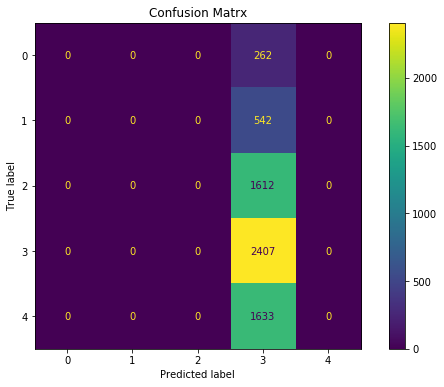

In [61]:
#Creating matplotlib axes object to assign figuresize and figure title
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Confusion Matrx')

disp =metrics.plot_confusion_matrix(lm, x_test, y_test, ax = ax)
disp.confusion_matrix

In [62]:
# get importance
importance = lm.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance


Feature: 0, Score: 0.09196
Feature: 1, Score: 0.34597
Feature: 2, Score: 0.07218
Feature: 3, Score: 0.00496
Feature: 4, Score: -0.00900


Feature: 0, Score: 1.71686
Feature: 1, Score: 6.56408
Feature: 2, Score: 10.07987
Feature: 3, Score: 30.37423
Feature: 4, Score: 51.26496


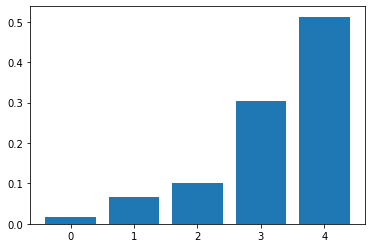

In [63]:
importance = clf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v*100))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()